In [1]:
!pip install psycopg2-binary pandas matplotlib seaborn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 24.5 MB/s eta 0:00:00


In [2]:
from google.colab import files
uploaded = files.upload()


Saving cashback_loyalty_monthly.csv to cashback_loyalty_monthly.csv
Saving category_revenue.csv to category_revenue.csv
Saving device_usage_summary.csv to device_usage_summary.csv
Saving failed_transactions_summary.csv to failed_transactions_summary.csv
Saving location_revenue.csv to location_revenue.csv
Saving merchant_performance.csv to merchant_performance.csv
Saving payment_method_summary.csv to payment_method_summary.csv
Saving revenue_by_month.csv to revenue_by_month.csv


In [4]:
!pip install pandas matplotlib seaborn openpyxl

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Set plot style
sns.set(style="whitegrid")

In [39]:
import os

print("Uploaded files:")
for file in uploaded.keys():
    print("-", file)


print("\n Files in working directory:")
for file in os.listdir():
    if file.endswith(".csv"):
        print("•", file)

Uploaded files:
- cashback_loyalty_monthly.csv
- category_revenue.csv
- device_usage_summary.csv
- failed_transactions_summary.csv
- location_revenue.csv
- merchant_performance.csv
- payment_method_summary.csv
- revenue_by_month.csv

 Files in working directory:
• revenue_by_month.csv
• location_revenue.csv
• category_revenue.csv
• device_usage_summary.csv
• merchant_performance.csv
• failed_transactions_summary.csv
• cashback_loyalty_monthly.csv
• payment_method_summary.csv


In [7]:
revenue_df = pd.read_csv("revenue_by_month.csv")
category_df = pd.read_csv("category_revenue.csv")
merchant_df = pd.read_csv("merchant_performance.csv")
cashback_df = pd.read_csv("cashback_loyalty_monthly.csv")
failed_df = pd.read_csv("failed_transactions_summary.csv")
payment_df = pd.read_csv("payment_method_summary.csv")
device_df = pd.read_csv("device_usage_summary.csv")

In [8]:
print("Revenue by Month:")
print(revenue_df.head(), "\n")

print("Top Product Categories:")
print(category_df.head(), "\n")

print("Merchant Performance:")
print(merchant_df.head(), "\n")


Revenue by Month:
                       month     revenue  transaction_count
0  2024-08-01 00:00:00+05:30  1232249.97                246
1  2024-01-01 00:00:00+05:30  1920533.09                384
2  2024-04-01 00:00:00+05:30  1855494.99                367
3  2023-11-01 00:00:00+05:30  1914608.99                377
4  2024-03-01 00:00:00+05:30  2094877.51                408 

Top Product Categories:
  product_category  total_txns  total_revenue
0    Internet Bill         216     1180596.71
1    Education Fee         276     1290696.79
2         Gas Bill         239     1298004.96
3   Flight Booking         207     1062516.88
4  Mobile Recharge         232     1145753.93 

Merchant Performance:
  merchant_name  total_transactions  total_revenue  avg_cashback
0      Snapdeal                  49      242559.83     52.226939
1      Domino's                  57      265885.36     53.574211
2       Hathway                  49      254339.81     45.491633
3     BigBasket                  48 

**Revenue Trend Over Time**

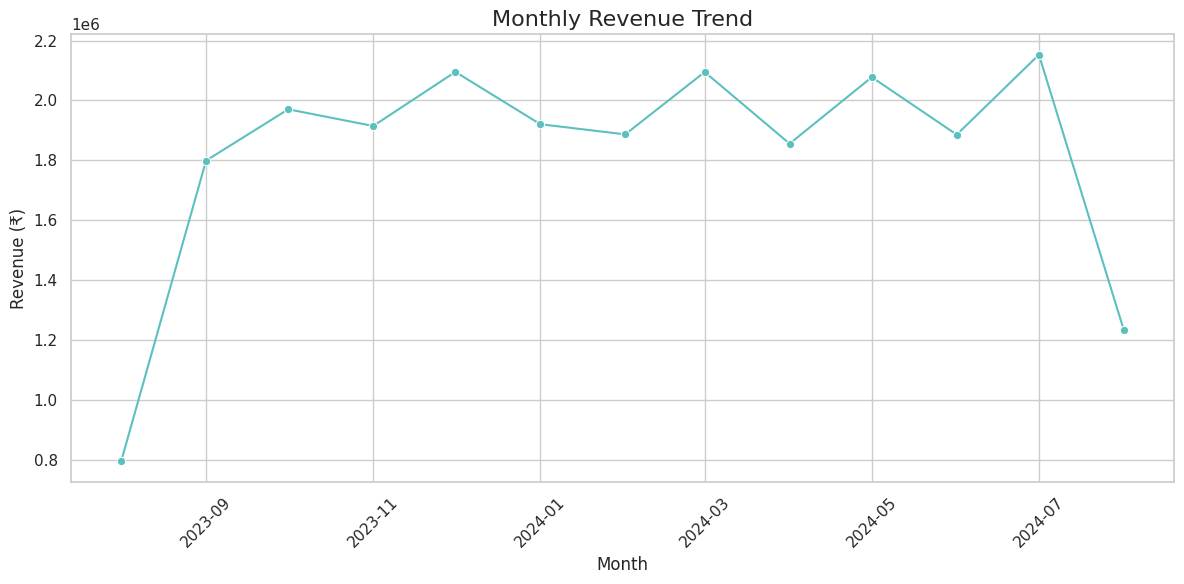

In [38]:
revenue_df['month'] = pd.to_datetime(revenue_df['month'])
revenue_df.sort_values('month', inplace=True)

plt.figure(figsize=(12, 6))
sns.lineplot(data=revenue_df, x='month', y='revenue', marker='o', color='#5BC0BE')
plt.title("Monthly Revenue Trend", fontsize=16)
plt.xlabel("Month")
plt.ylabel("Revenue (₹)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**Monthly Revenue Growth %**

In [12]:
revenue_df['month'] = pd.to_datetime(revenue_df['month'])
revenue_df = revenue_df.sort_values('month').reset_index(drop=True)

revenue_df['growth_%'] = revenue_df['revenue'].pct_change() * 100

revenue_df[['month', 'revenue', 'growth_%']]


,month,revenue,growth_%
0,2023-08-01 00:00:00+05:30,793902.12,NaN
1,2023-09-01 00:00:00+05:30,1798919.74,126.592132
2,2023-10-01 00:00:00+05:30,1970348.42,9.529535
3,2023-11-01 00:00:00+05:30,1914608.99,-2.828912
4,2023-12-01 00:00:00+05:30,2095310.40,9.438032
5,2024-01-01 00:00:00+05:30,1920533.09,-8.341356
6,2024-02-01 00:00:00+05:30,1886527.48,-1.770634
7,2024-03-01 00:00:00+05:30,2094877.51,11.044103
8,2024-04-01 00:00:00+05:30,1855494.99,-11.427041
9,2024-05-01 00:00:00+05:30,2077701.98,11.975618


**Top Product Categories by Revenue**

/tmp/ipython-input-37-280332649.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=category_df, y='product_category', x='total_revenue', palette='Blues_d')


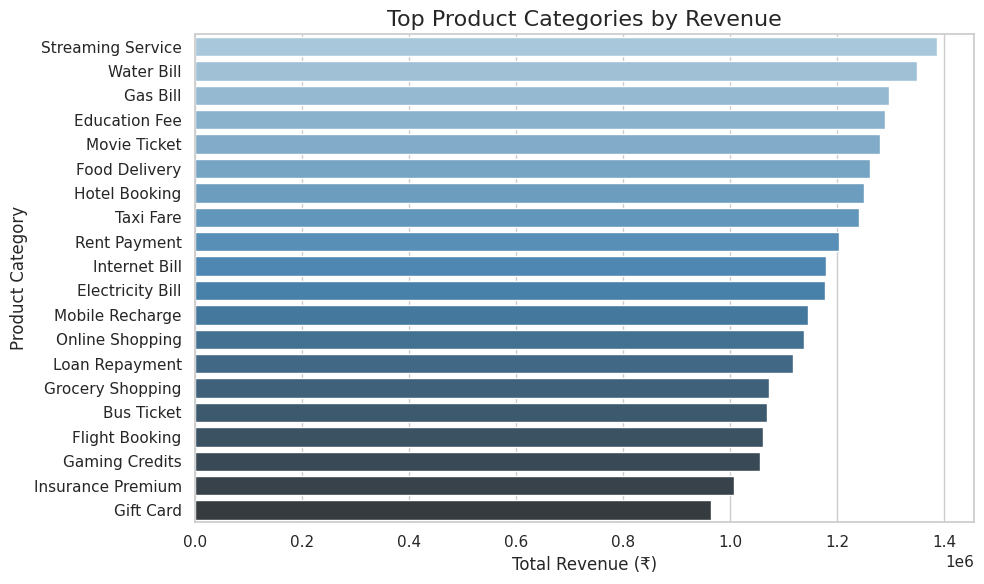

In [37]:
category_df.sort_values('total_revenue', ascending=False, inplace=True)

plt.figure(figsize=(10, 6))
sns.barplot(data=category_df, y='product_category', x='total_revenue', palette='Blues_d')
plt.title("Top Product Categories by Revenue", fontsize=16)
plt.xlabel("Total Revenue (₹)")
plt.ylabel("Product Category")
plt.tight_layout()
plt.show()


**Merchant Performance Overview**

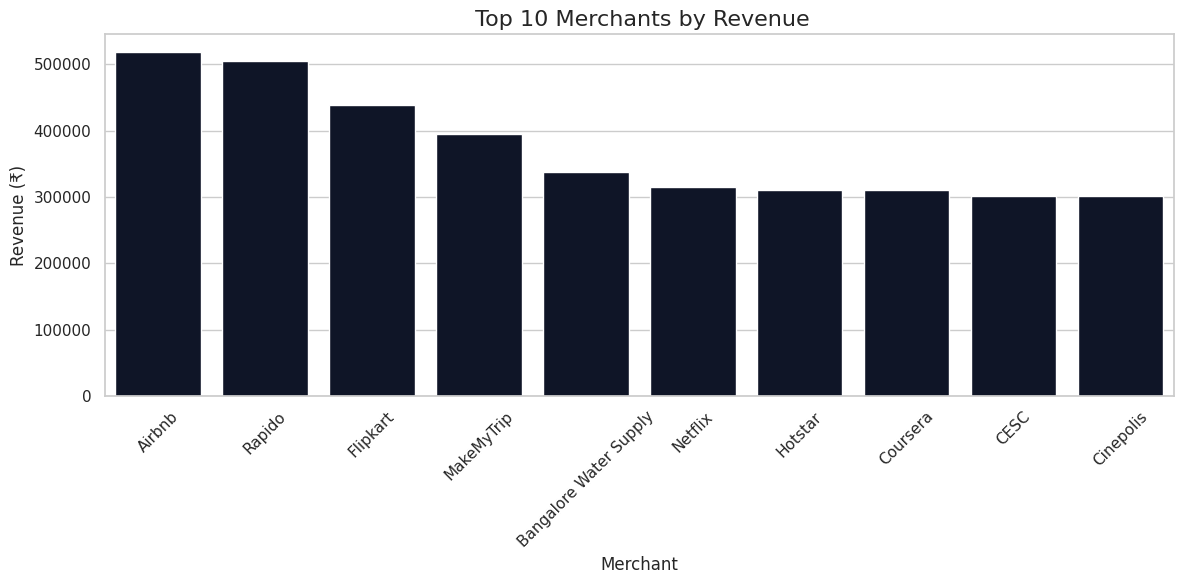

In [35]:
top_merchants = merchant_df.sort_values('total_revenue', ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(data=top_merchants, x='merchant_name', y='total_revenue', color='#0B132B')
plt.title(" Top 10 Merchants by Revenue", fontsize=16)
plt.xlabel("Merchant")
plt.ylabel("Revenue (₹)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Cashback vs Loyalty Points Trend**

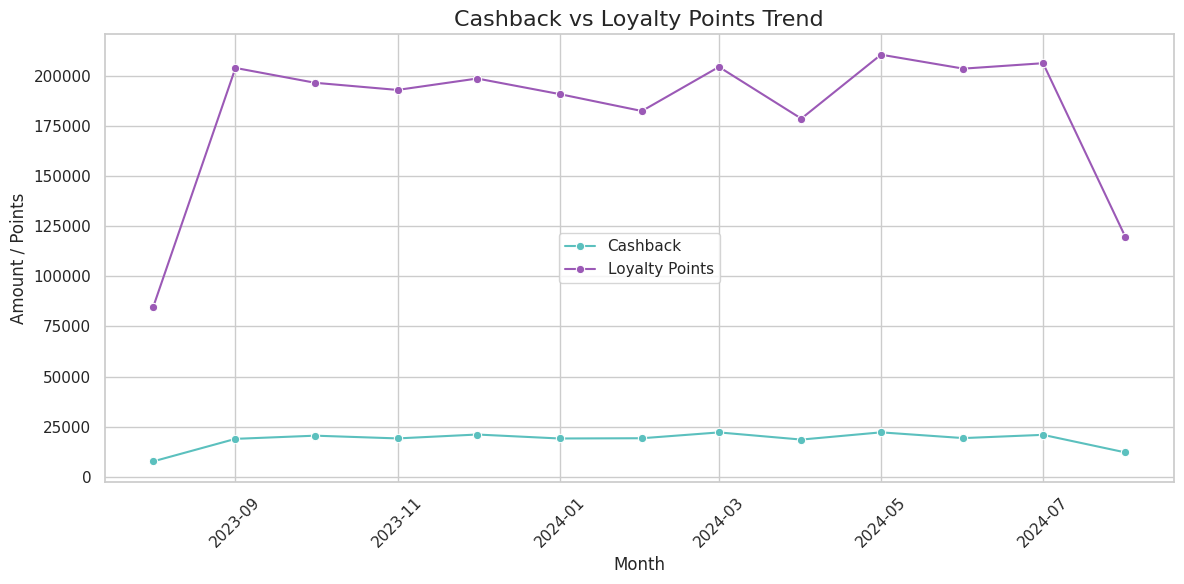

In [36]:
cashback_df['month'] = pd.to_datetime(cashback_df['month'])

plt.figure(figsize=(12, 6))
sns.lineplot(data=cashback_df, x='month', y='total_cashback', label='Cashback', marker='o', color='#5BC0BE')
sns.lineplot(data=cashback_df, x='month', y='total_loyalty_points', label='Loyalty Points', marker='o', color='#9B59B6')
plt.title("Cashback vs Loyalty Points Trend", fontsize=16)
plt.xlabel("Month")
plt.ylabel("Amount / Points")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


**Failed Transaction Analysis**

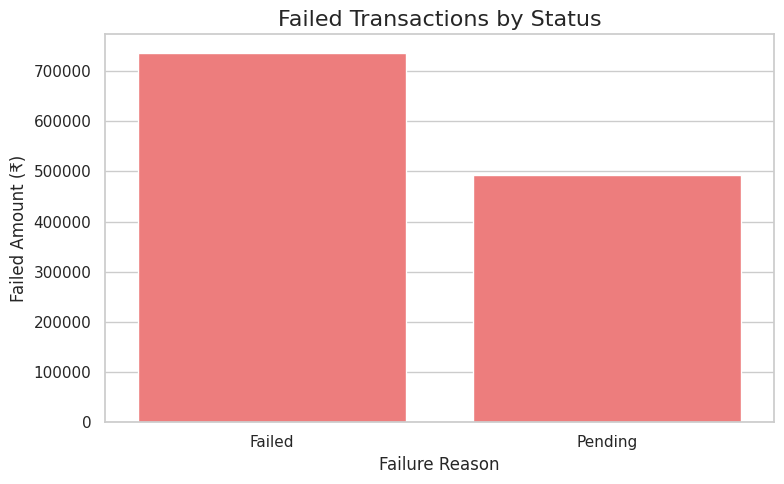

In [17]:
failed_df.sort_values('failed_amount', ascending=False, inplace=True)

plt.figure(figsize=(8, 5))
sns.barplot(data=failed_df, x='transaction_status', y='failed_amount', color='#FF6B6B')
plt.title("Failed Transactions by Status", fontsize=16)
plt.xlabel("Failure Reason")
plt.ylabel("Failed Amount (₹)")
plt.tight_layout()
plt.show()


**Payment Method Distribution**

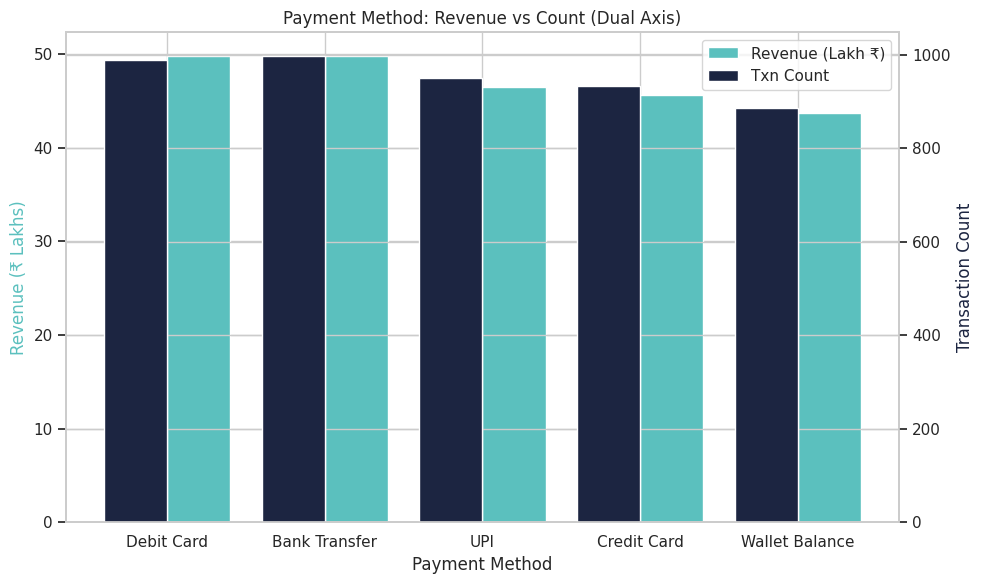

In [33]:
fig, ax1 = plt.subplots(figsize=(10,6))

ax2 = ax1.twinx()

methods = payment_df['payment_method']
amounts = payment_df['total_amount'] / 100000  # Lakhs
counts = payment_df['txn_count']

# Bar 1 — Revenue
ax1.bar(methods, amounts, width=0.4, align='edge', color='#5BC0BE', label='Revenue (Lakh ₹)')
# Bar 2 — Count
ax2.bar(methods, counts, width=-0.4, align='edge', color='#1C2541', label='Txn Count')

# Labels and Titles
ax1.set_ylabel("Revenue (₹ Lakhs)", color='#5BC0BE')
ax2.set_ylabel("Transaction Count", color='#1C2541')
plt.title("Payment Method: Revenue vs Count (Dual Axis)")
ax1.set_xlabel("Payment Method")

# Legends
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
plt.legend(lines_1 + lines_2, labels_1 + labels_2, loc="upper right")

plt.tight_layout()
plt.show()


** Device Type Breakdown**

/tmp/ipython-input-34-3395063833.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=device_df, x='device_type', y='total_spent', palette='pastel')


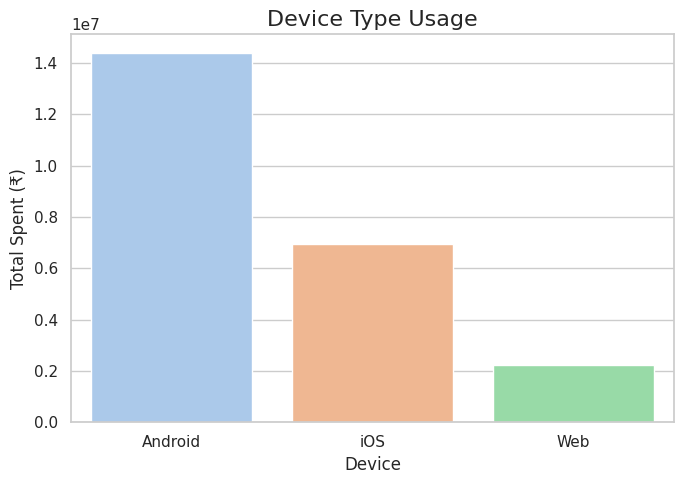

In [34]:
device_df.sort_values('total_spent', ascending=False, inplace=True)

plt.figure(figsize=(7, 5))
sns.barplot(data=device_df, x='device_type', y='total_spent', palette='pastel')
plt.title("Device Type Usage", fontsize=16)
plt.xlabel("Device")
plt.ylabel("Total Spent (₹)")
plt.tight_layout()
plt.show()


In [28]:
revenue_df['month'] = pd.to_datetime(revenue_df['month']).dt.strftime("%Y-%m")


revenue_df.to_excel("monthly_revenue_growth.xlsx", index=False)

from google.colab import files
files.download("monthly_revenue_growth.xlsx")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [30]:
top_merchants = merchant_df.sort_values('total_revenue', ascending=False).head(10)
top_merchants.to_excel("top_merchants.xlsx", index=False)

from google.colab import files
files.download("top_merchants.xlsx")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [31]:
top_categories = category_df.sort_values('total_revenue', ascending=False)

top_categories.to_excel("top_categories.xlsx", index=False)
files.download("top_categories.xlsx")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [32]:
# Ensure datetime column is clean
cashback_df['month'] = pd.to_datetime(cashback_df['month']).dt.tz_localize(None)

cashback_df.to_excel("cashback_loyalty_trend.xlsx", index=False)
files.download("cashback_loyalty_trend.xlsx")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [29]:
merchant_df.sort_values('total_revenue', ascending=False).head(1)

,merchant_name,total_transactions,total_revenue,avg_cashback
65,Airbnb,99,519187.59,48.224949


**Conclusion / Insights**

 - Revenue increased steadily over the year, peaking in July 2024 at ₹2.15M before dropping in August.

 - Top Product Categories by revenue were Electronics and Fashion.

 - Airbnb contributed the most to revenue and had the highest average cashback.

 - A 42% drop in revenue occurred in August — further investigation is needed.

 - UPI and Wallets were the most-used payment methods, but Cards brought higher transaction value.

 - Mobile usage dominates over Desktop, indicating mobile-first behavior.